<a href="https://colab.research.google.com/github/loganathan001/AI/blob/master/Learnings/py_dnn_sentdex/tensorflow/Spiral_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import sklearn

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.utils import np_utils
from keras import backend as K

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


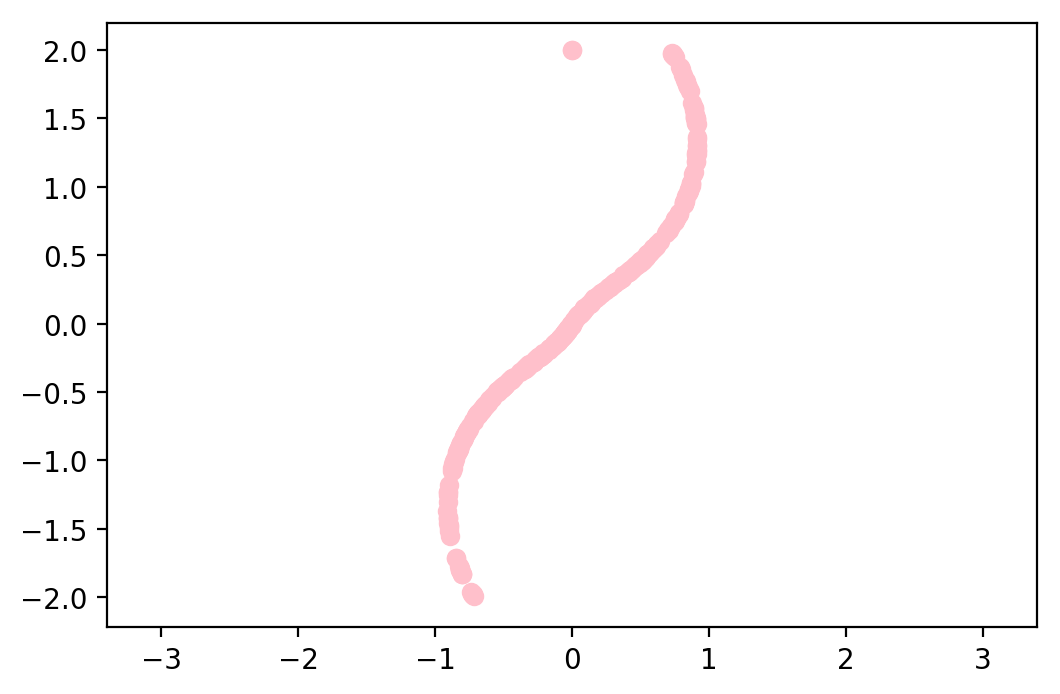

In [109]:
LEN = 100000
ROUND_DIGITS = 2
ALLOWED_DEVIATION = 1

xs = np.random.rand(LEN) * 2 - 1
ys = np.random.rand(LEN) * 2 - 1


df = pd.DataFrame(data=np.array([xs, ys]).T)

plt.rcParams['figure.dpi'] = 100
plt.ion()
plt.axis('equal')

df.columns = ['X', 'Y']

def spiralValue(x,y):
  return (x * np.tan(np.sqrt(x**2 + y**2)))

def isSpiral(x,y):
  yval = round(y, ROUND_DIGITS)
  y_spiral = round(spiralValue(x,y), ROUND_DIGITS)
  return np.abs(yval - y_spiral) == ALLOWED_DEVIATION

df['Spiral1'] = [True if isSpiral(x,y)
                 else False 
                 for x,y in zip(df['X'], df['Y'])]

df_x_gt_0 = df[ df['X'] > 0 ]
df_Spiral1 = df_x_gt_0[  df_x_gt_0['Spiral1'] == True  ] 
df_Spiral1['Y'] = df_Spiral1['Y'] + 1


df_x_lt_0 = df[ df['X'] < 0 ]
df_Spiral2 = df_x_lt_0[  df_x_lt_0['Spiral1'] == True  ] 
df_Spiral2['Y'] = df_Spiral2['Y'] - 1


#print(df_ones.head())

#plt.imshow(im, cmap='gray')
plt.scatter(df_Spiral1['X'], df_Spiral1['Y'], c='pink')
plt.scatter(df_Spiral2['X'], df_Spiral2['Y'], c='pink')

#plt.scatter(df['X'], df['Y_Circle2_Pos'], c='purple')



#plt.savefig('digit_img.png')